# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
%load_ext autoreload
%aimport agent, models

In [2]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.21 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
import agent

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [7]:
states

array([[  0.00000000e+00,  -4.00000000e+00,   0.00000000e+00,
          1.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -4.37113883e-08,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -1.00000000e+01,
          0.00000000e+00,   1.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -4.37113883e-08,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.75471878e+00,
         -1.00000000e+00,   5.55726671e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,  -1.68164849e-01]])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
'''env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
iteration = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    print("\t", actions)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    if rewards[0] != 0:
        print("rewards", rewards)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print(iteration)
        break
    iteration += 1
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

'env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\niteration = 0\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    print("\t", actions)\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    if rewards[0] != 0:\n        print("rewards", rewards)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (fo

In [9]:
'''  
import queue
from collections import deque

print_every = 200
# seems to be 1000 for the env anyway
max_ts = 2000
max_episodes = 1000
curr_agent = agent.Agent(state_size, action_size)

env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
state = env_info.vector_observations[0]                  # get the current state (for each agent)
# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []

episode_won_i = 0

with active_session():
    # TODO: maybe set max # of episodes
    for i in range(max_episodes):
        score = 0
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # because random numpy actions at the beginning are already numpy
            
            try:
                action = action.to("cpu").detach().numpy()
            except:
                pass
            if t % print_every == 0:
                print('\taction', action)
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards[0]
            if reward != 0:
                print("reward", reward)
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]
            
            score = score * curr_agent.Q_DISCOUNT + reward

            curr_agent.step(state, action, reward, next_state, done)


            if done: 
                print("episode {} at {} ts; done reached".format(i, t))
                break
        scores_history.append(score)
        scores.append(score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
        
'''     

'  \nimport queue\nfrom collections import deque\n\nprint_every = 200\n# seems to be 1000 for the env anyway\nmax_ts = 2000\nmax_episodes = 1000\ncurr_agent = agent.Agent(state_size, action_size)\n\nenv_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstate = env_info.vector_observations[0]                  # get the current state (for each agent)\n# can\'t use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"\nscores = deque(maxlen=100)                          # initialize the score (for each agent)\nscores_history = []\n\nepisode_won_i = 0\n\nwith active_session():\n    # TODO: maybe set max # of episodes\n    for i in range(max_episodes):\n        score = 0\n        for t in range(max_ts):\n            action = curr_agent.act(state.astype(\'float32\', copy=False))\n            \n            # because random numpy actions at the beginning are already numpy\n            \n            try:\n     

In [10]:
import queue
from collections import deque

print_every = 300
# seems to be 1000 for the env anyway
max_ts = 2000
max_episodes = 500
curr_agent = agent.Agent(state_size, action_size)


# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []


# env expecting the list?
# action not in the form env was expecting?

# dropout too high?


episode_won_i = 0

with active_session():
    for i in range(max_episodes):
        # initialize for the start of the episode
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations[0]                  # get the current state (for each agent)
        # resets the noise class variable
        curr_agent.reset()
        score = 0
        
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            if t % print_every == 0:
                print('\taction', action)
                
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards[0]
            if reward != 0:
                print("reward", reward)
            next_state = env_info.vector_observations[0]
            done = env_info.local_done[0]
            
            #score = score * curr_agent.Q_DISCOUNT + reward[0]
            #score = score * curr_agent.Q_DISCOUNT + reward
            score = score + reward

            curr_agent.step(state, action, reward, next_state, done)
            state = next_state

            # done is a vector
            if done: 
            #if done[0]: 
                print("episode {} at {} ts; done reached".format(i, t))
                break
        scores_history.append(score)
        scores.append(score)
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
            
    print(scores_history)
        
        

	action [ 0.01396207  0.06307286  0.09043477  0.1127754 ]
	action [-0.32899454  1.         -0.19964397 -0.24771798]
	action [-0.10395262  1.         -0.16794744  1.        ]
reward 0.019999999552965164
reward 0.03999999910593033
	action [-0.22072846  1.          0.48670959 -0.33961049]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746
episode 0 at 1000 ts; done reached
episode 0; average score past 100 episodes: 0.19999999552965164
	action [-0.88078493  1.          1.          0.83279395]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
	action [-0.39198765  1.          1.          1.        ]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
rewar

reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [-0.55673379  1.          1.         -0.14792208]
	action [-0.42934525  1.          1.         -0.22293507]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
	action [-0.34373206  1.          1.         -0.34159422]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.029999999329447746
episode 10 at 1000 ts; done reached
	action [-0.88234419  1.          1.         -0.99515933]
	action [-0.14764459  1.          1.         -0.49359664]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.009999999776482582
	action [ 1.          1.          1.         -0.41492879]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999

	action [-0.3189857   1.          1.         -0.46384257]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
episode 23 at 1000 ts; done reached
	action [-0.97034353  1.          1.         -0.92773193]
	action [-0.40436304  1.          1.         -0.43008164]
reward 0.019999999552965164
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
	action [-0.28112468  1.          1.         -0.24963924]
reward 0.009999999776482582
reward 0.03999999910593033
	action [-0.27568328  1.          1.         -0.22324754]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
episode 24 at 1000 ts; done reached
	action [-0.95625544  1.          1.         -0.87490231]
reward 0.029999999329447746
reward 0.03999999910593033
reward

reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [-0.42568231  1.          1.         -0.45814747]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.009999999776482582
	action [-0.06957445  1.          1.         -0.32541519]
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
	action [-0.12047474  1.          1.         -0.24623431]
episode 34 at 1000 ts; done reached
	action [-0.82544607  1.          1.         -0.87238699]
	action [-0.19062348  1.          1.         -0.33151665]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910

	action [-0.24412587 -0.36106548 -0.28875864 -0.25428158]
	action [-0.42752585 -0.301781   -0.43040171 -0.36993742]
	action [-0.4802255  -0.45556042 -0.30728942 -0.33210236]
episode 55 at 1000 ts; done reached
	action [-0.88769525 -0.863796   -0.97307462 -0.98103923]
	action [-0.40512887 -0.37493715 -0.55064148 -0.46619755]
	action [-0.22593774 -0.49158064 -0.33622631 -0.3763383 ]
	action [-0.4436287  -0.33196145 -0.39610082 -0.23390287]
episode 56 at 1000 ts; done reached
	action [-0.88545811 -0.8081193  -0.92854124 -0.8181324 ]
	action [-0.49850512 -0.10397314 -0.31107873 -0.54746616]
	action [-0.4051975  -0.38841668 -0.32607543 -0.38029727]
	action [-0.43997607 -0.31572649 -0.47838852 -0.28684103]
episode 57 at 1000 ts; done reached
	action [-0.85961711 -0.93725008 -0.91119939 -0.80631435]
	action [-0.240197   -0.4341231  -0.45478678 -0.36882839]
	action [-0.39233571 -0.16450913 -0.32596451 -0.44839931]
	action [-0.43031192 -0.27543139 -0.36061904 -0.18336385]
episode 58 at 1000 ts;

	action [-0.51697588 -0.53468704 -0.45920965 -0.54489011]
	action [-0.34941736 -0.54861355 -0.17978631 -0.36886021]
episode 85 at 1000 ts; done reached
	action [-0.96556967 -0.87776542 -0.98998535 -0.88910979]
	action [-0.34710026 -0.28078893 -0.20360821 -0.1416695 ]
	action [-0.40455937 -0.27063423 -0.31121501 -0.49714729]
	action [-0.25611019 -0.20915395 -0.42322519 -0.43254983]
episode 86 at 1000 ts; done reached
	action [-0.90531641 -0.81399363 -0.90867019 -0.85600966]
	action [-0.19301762 -0.14497909 -0.29658458 -0.34092167]
	action [-0.40428057 -0.36419258 -0.50224036 -0.32839221]
	action [-0.42227247 -0.18795045 -0.15216997 -0.19000316]
episode 87 at 1000 ts; done reached
	action [-0.81960082 -0.95063961 -0.87416774 -0.99202681]
reward 0.029999999329447746
reward 0.029999999329447746
	action [-0.28658283 -0.31468958 -0.27577415 -0.25726432]
	action [-0.32175413 -0.21149951 -0.29552746 -0.17962801]
	action [-0.21373256 -0.53205484 -0.12822369 -0.34773844]
episode 88 at 1000 ts; d

	action [-0.54141301 -0.26384857 -0.17555097 -0.30925107]
	action [-0.3045629  -0.22380662 -0.41656765 -0.36298212]
	action [-0.15397863 -0.33709148 -0.41890991 -0.44767332]
episode 115 at 1000 ts; done reached
	action [-0.82096726 -0.92247808 -0.86882651 -0.98816973]
	action [-0.32787284 -0.23912868 -0.18336394 -0.25290763]
	action [-0.30599728 -0.39990225 -0.20560145 -0.32833147]
	action [-0.28322732 -0.3171128  -0.36514169 -0.32649624]
episode 116 at 1000 ts; done reached
	action [-0.81256849 -0.94997287 -0.84484953 -0.95994812]
	action [-0.23650952 -0.46399176 -0.39931443 -0.31381869]
	action [-0.2114532  -0.20563336 -0.53225309 -0.08998209]
	action [-0.44813585 -0.23297529 -0.26323813 -0.31593755]
episode 117 at 1000 ts; done reached
	action [-0.81472528 -0.98313177 -0.92104107 -0.84263361]
	action [-0.26719892 -0.37189564 -0.27350122 -0.31921461]
	action [-0.38358063 -0.24413271 -0.34205681 -0.5123831 ]
	action [-0.3754071  -0.17195643 -0.06448094 -0.42353514]
episode 118 at 1000

	action [-0.28785467 -0.22255257 -0.24451616 -0.2778067 ]
episode 144 at 1000 ts; done reached
	action [-0.80026054 -0.81984949 -0.99887848 -0.88179868]
	action [-0.39274684 -0.14599943 -0.23060042 -0.46482694]
	action [-0.50100642 -0.39436561 -0.27242535 -0.40962714]
	action [-0.10315451 -0.35258818 -0.41510502 -0.0685635 ]
episode 145 at 1000 ts; done reached
	action [-0.87899143 -0.92161012 -0.84667414 -0.98616558]
	action [-0.45060372 -0.26362702 -0.33998355 -0.38168904]
	action [-0.413225   -0.28618738 -0.2744326  -0.10592639]
	action [-0.39181545 -0.27285412 -0.29978818 -0.3721039 ]
episode 146 at 1000 ts; done reached
	action [-0.95637697 -0.97843021 -0.95598197 -0.83873528]
	action [-0.21777581 -0.19545765 -0.35966501 -0.36419615]
	action [-0.1906341  -0.62852931 -0.3257384  -0.44714105]
	action [-0.39494389 -0.47240651 -0.47371566 -0.51823181]
episode 147 at 1000 ts; done reached
	action [-0.91153133 -0.95526826 -0.93247432 -0.90574437]
	action [-0.34640095 -0.30687782 -0.2275

	action [-0.29014671 -0.388376   -0.40371829 -0.17814739]
	action [-0.39348355 -0.46813744 -0.43537626 -0.30600652]
episode 174 at 1000 ts; done reached
	action [-0.89331144 -0.93464923 -0.90227258 -0.84209806]
	action [-0.10771627 -0.13763519 -0.35655141 -0.19522886]
	action [-0.42987451 -0.37651616 -0.30578238 -0.47641268]
	action [-0.22674404 -0.40559018 -0.2025363  -0.48168787]
episode 175 at 1000 ts; done reached
	action [-0.97360677 -0.87851679 -0.97472632 -0.98776442]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [-0.18144803 -0.43732718 -0.37619728 -0.28212759]
	action [-0.41519085 -0.38230458 -0.36324611 -0.18152358]
	action [-0.41122368 -0.16681704 -0.28558719 -0.39233571]
episode 176 at 1000 ts; done reached
	action [-0.98755121 -0.93614715 -0.8408103  -0.8730101 ]
	action [-0.44534013 -0.52438754 -0.42126766 -0.50902331]
	action [-0.24913712 -0.1993455  -0.27469414 -0.46385205

	action [-0.08101852 -0.35774672 -0.45084208 -0.63182604]
	action [-0.49930763 -0.20253737 -0.2503674  -0.21149783]
episode 204 at 1000 ts; done reached
	action [-0.89240056 -0.84825438 -0.84493452 -0.8623299 ]
	action [-0.17191084 -0.32020915 -0.26371092 -0.36100084]
	action [-0.19859743 -0.65501535 -0.32956651 -0.3488504 ]
	action [-0.34690735 -0.40380877 -0.08707716 -0.43564874]
episode 205 at 1000 ts; done reached
	action [-0.94410276 -0.98681086 -0.82912892 -0.81638336]
	action [-0.23645662 -0.26321018 -0.17988768 -0.27544031]
	action [-0.48538703 -0.32028043 -0.35957971 -0.35851958]
	action [-0.38737762 -0.47733146 -0.1942585  -0.36459261]
episode 206 at 1000 ts; done reached
	action [-0.95202434 -0.90023476 -0.95847046 -0.96217936]
	action [-0.32035854 -0.3666124  -0.25982159 -0.33308202]
	action [-0.37918773 -0.41701499 -0.26577362 -0.26324546]
	action [-0.23466025 -0.35351878 -0.40645167 -0.45928541]
episode 207 at 1000 ts; done reached
	action [-0.84760946 -0.86742228 -0.8119

	action [-0.53213501 -0.16977564 -0.23235995 -0.31025755]
	action [-0.39163679 -0.38100711 -0.38673437 -0.0546292 ]
	action [-0.17042863 -0.37467062 -0.23249479 -0.32143277]
episode 234 at 1000 ts; done reached
	action [-0.95042777 -0.87136227 -0.91202188 -0.89844304]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.029999999329447746
	action [-0.3452124  -0.28203213 -0.0770759  -0.57089877]
	action [-0.29711768 -0.43903986 -0.42734456 -0.2397384 ]
	action [-0.3100819  -0.15574257 -0.29241732 -0.41743323]
episode 235 at 1000 ts; done reached
	action [-0.94008815 -0.90282047 -0.80145025 -0.83849311]
	action [-0.3472288  -0.30886108 -0.31465182 -0.43369025]
	action [-0.38117531 -0.38742959 -0.19565701 -0.20623405]
	action [-0.45542899 -0.46929824 -0.25030321 -0.40147692]
episode 236 at 1000 ts; done reached
	action [-0.87949824 -0.8495279  -0.97748858 -0.83461595]
	action [-0.49148959 -0.47280425 -0.36109531 -0.26167387]
	action [-0.24910675 -0.3

	action [-0.17425227 -0.44836524 -0.32151097 -0.42799288]
	action [-0.43435299 -0.49305922 -0.24319468 -0.22326581]
	action [-0.28789678 -0.32242528 -0.3671729  -0.39174399]
episode 263 at 1000 ts; done reached
	action [-0.88764048 -0.97469765 -0.98695111 -0.98966432]
	action [-0.39280233 -0.55895013 -0.30331269 -0.20339085]
	action [-0.17242473 -0.16182092 -0.41711262 -0.38601637]
	action [-0.29844281 -0.20360337 -0.49315172 -0.47178572]
episode 264 at 1000 ts; done reached
	action [-0.93844104 -0.95129639 -0.85250902 -0.89830989]
reward 0.019999999552965164
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.03999999910593033
reward 0.009999999776482582
	action [-0.47690642 -0.28940749 -0.35515276 -0.51997924]
	action [-0.24124944 -0.34102708 -0.27853566 -0.35238025]
	action [-0.4293313  -0.42354655 -0.34511721 -0.39141032]
episode 265 at 1000 ts; done reached
	action [-0.98613346 -0.87885797 -0.93095684 -0.94928849]
	action [-0.34006307 -0.25833765 -0.33621481 -0.23966129

episode 292 at 1000 ts; done reached
	action [-0.90889925 -0.88720447 -0.98412806 -0.96397102]
	action [-0.25354257 -0.52657789 -0.27865714 -0.3286742 ]
	action [-0.4279961  -0.35431963 -0.30405077 -0.32177702]
	action [-0.28627503 -0.34575856 -0.52416575 -0.1485644 ]
episode 293 at 1000 ts; done reached
	action [-0.92090243 -0.88238847 -0.93451208 -0.8623032 ]
	action [-0.30747831 -0.37824196 -0.21691266 -0.5223642 ]
	action [-0.23635358 -0.28002921 -0.138402   -0.34273449]
	action [-0.31713608 -0.37109721 -0.40866742 -0.32332054]
episode 294 at 1000 ts; done reached
	action [-0.8635422  -0.96792775 -0.88303834 -0.89142197]
	action [-0.38197792 -0.32021344 -0.11806531 -0.28021288]
	action [-0.34947819 -0.17964225 -0.15889385 -0.55072999]
	action [-0.37828094 -0.41565475 -0.30097234 -0.51353502]
episode 295 at 1000 ts; done reached
	action [-0.9887619  -0.83429229 -0.94658762 -0.85702938]
reward 0.009999999776482582
reward 0.03999999910593033
reward 0.029999999329447746
	action [-0.295

	action [-0.28193155 -0.35248747 -0.24598491 -0.23869728]
	action [-0.46308273 -0.36410782 -0.25705525 -0.27694035]
episode 321 at 1000 ts; done reached
	action [-0.92611516 -0.96788484 -0.95308179 -0.94770241]
	action [-0.34721413 -0.45874074 -0.25266284 -0.38267469]
	action [-0.1775796  -0.33196184 -0.14955151 -0.20876047]
	action [-0.44223833 -0.44230464 -0.20947559 -0.13818033]
episode 322 at 1000 ts; done reached
	action [-0.81014776 -0.90813375 -0.8188417  -0.91291338]
	action [-0.3827492  -0.38688701 -0.52411067 -0.39211929]
	action [-0.33972391 -0.18687271 -0.47034928 -0.51953596]
	action [-0.45509738 -0.4250049  -0.45799962 -0.24611396]
episode 323 at 1000 ts; done reached
	action [-0.86831516 -0.82874227 -0.83233762 -0.92686284]
	action [-0.15189192 -0.42781857 -0.25774533 -0.39422876]
	action [-0.32274982 -0.11144125 -0.30709022 -0.31651893]
	action [-0.31544825 -0.33851731 -0.53144556 -0.38552985]
episode 324 at 1000 ts; done reached
	action [-0.90154618 -0.86652011 -0.9316

	action [-0.29871127 -0.44375804 -0.32682377 -0.21910378]
	action [-0.39896855 -0.26552624 -0.37422732 -0.18605413]
	action [-0.25881079 -0.3841801  -0.30586377 -0.31160977]
episode 351 at 1000 ts; done reached
	action [-0.97652304 -0.91787088 -0.8078866  -0.92177308]
	action [-0.25327191 -0.12501234 -0.25638592 -0.29795504]
	action [-0.28250548 -0.14272679 -0.31149772 -0.12273859]
	action [-0.22508955 -0.38308141 -0.28051046 -0.3096616 ]
episode 352 at 1000 ts; done reached
	action [-0.96434432 -0.89245921 -0.89170831 -0.84845787]
	action [-0.25153649 -0.31220996 -0.33238003 -0.26603651]
	action [-0.30568135 -0.32060939 -0.33336785 -0.37910041]
	action [-0.30997935 -0.13566871 -0.29438028 -0.30859223]
episode 353 at 1000 ts; done reached
	action [-0.88906324 -0.80939621 -0.89933246 -0.96575236]
	action [-0.29918131 -0.34840873 -0.36009938 -0.28898531]
	action [-0.31536427 -0.16973791 -0.34460196 -0.34017769]
	action [-0.32405451 -0.55125475 -0.32089612 -0.47255212]
episode 354 at 1000

episode 381 at 1000 ts; done reached
	action [-0.9687115  -0.99914467 -0.87557483 -0.82295716]
	action [-0.29979485 -0.51558912 -0.15206708 -0.34976923]
	action [-0.1432804  -0.24427888 -0.62224984 -0.20533514]
	action [-0.2286281  -0.33470732 -0.45035645 -0.11532483]
episode 382 at 1000 ts; done reached
	action [-0.89781392 -0.90334398 -0.9800809  -0.89085108]
reward 0.029999999329447746
reward 0.03999999910593033
reward 0.029999999329447746
	action [-0.42867905 -0.38402086 -0.40701658 -0.24555105]
	action [-0.09565067 -0.38605031 -0.3661963  -0.29150304]
	action [-0.34364209 -0.37521085 -0.18810607 -0.18600559]
episode 383 at 1000 ts; done reached
	action [-0.84328651 -0.86404073 -0.98512459 -0.96278358]
	action [-0.25741088 -0.3687222  -0.24065283 -0.3972581 ]
	action [-0.37318242 -0.41603553 -0.30360484 -0.38231131]
	action [-0.32915229 -0.36396563 -0.10443297 -0.30219996]
episode 384 at 1000 ts; done reached
	action [-0.81485403 -0.8708446  -0.86117405 -0.95121646]
	action [-0.329

	action [-0.35123202 -0.31145409 -0.28016135 -0.25476778]
	action [-0.35174072 -0.21899419 -0.37015709 -0.44360751]
	action [-0.24615251 -0.44775888 -0.21269938 -0.4277932 ]
episode 411 at 1000 ts; done reached
	action [-0.83692235 -0.93559462 -0.85710663 -0.99419141]
	action [-0.24425717 -0.46742439 -0.36292875 -0.31530395]
	action [-0.22869456 -0.47237703 -0.35118553 -0.55549848]
	action [-0.30749279 -0.40940553 -0.33311009 -0.29063159]
episode 412 at 1000 ts; done reached
	action [-0.83270735 -0.92007732 -0.82532328 -0.8600812 ]
	action [-0.34464768 -0.38405904 -0.50456458 -0.19140269]
	action [-0.32369587 -0.1838838  -0.37566212 -0.1691525 ]
	action [-0.45453435 -0.27936289 -0.49325675 -0.43037292]
episode 413 at 1000 ts; done reached
	action [-0.83453494 -0.95050514 -0.83569235 -0.82024544]
	action [-0.37249598 -0.31100231 -0.34630865 -0.48046511]
	action [-0.36249244 -0.33094171 -0.35412785 -0.4004561 ]
	action [-0.38764688 -0.44459724 -0.29172838 -0.46845689]
episode 414 at 1000

	action [-0.4743802  -0.40165809 -0.52820849 -0.21044634]
	action [-0.36917007 -0.48416725 -0.44456792 -0.41249949]
	action [-0.25341824 -0.40849131 -0.26754633 -0.26654729]
episode 441 at 1000 ts; done reached
	action [-0.9182815  -0.92379731 -0.92133617 -0.97510415]
	action [-0.26246476 -0.34899554 -0.44643086 -0.21967854]
	action [-0.45993704 -0.42264155 -0.42356193 -0.27258691]
	action [-0.38035405 -0.5403868  -0.3457059  -0.11785747]
episode 442 at 1000 ts; done reached
	action [-0.99286598 -0.80602694 -0.85650891 -0.80854017]
	action [-0.26521686 -0.46881774 -0.27135178 -0.256311  ]
	action [-0.32693112 -0.30079055 -0.50049067 -0.26127341]
	action [-0.12736255 -0.28243974 -0.23276262 -0.32228649]
episode 443 at 1000 ts; done reached
	action [-0.97755837 -0.98341227 -0.90113711 -0.97171563]
reward 0.019999999552965164
	action [-0.18843983 -0.19679862 -0.21873873 -0.65100956]
	action [-0.19927147 -0.35191786 -0.43705535 -0.40784648]
	action [-0.36888587 -0.34199384 -0.20831677 -0.3

episode 470 at 1000 ts; done reached
	action [-0.93488896 -0.86042517 -0.90674883 -0.97617292]
	action [-0.33835199 -0.44310123 -0.38206863 -0.33729687]
	action [-0.35185024 -0.17215779 -0.40963846 -0.22970106]
	action [-0.20026205 -0.40475065 -0.17661545 -0.46061411]
episode 471 at 1000 ts; done reached
	action [-0.80252427 -0.91123235 -0.86001706 -0.81108516]
	action [-0.21338418 -0.11657191 -0.29331738 -0.27391687]
	action [-0.37267408 -0.31250224 -0.29211286 -0.25009814]
	action [-0.25192931 -0.29180673 -0.38946429 -0.41254568]
episode 472 at 1000 ts; done reached
	action [-0.98389232 -0.90821314 -0.81761944 -0.88603455]
	action [-0.40291488 -0.26875791 -0.37522087 -0.33912852]
	action [-0.20235571 -0.25645214 -0.30313358 -0.43456131]
	action [-0.3781032  -0.07332039 -0.27465355 -0.2523801 ]
episode 473 at 1000 ts; done reached
	action [-0.87133098 -0.83884507 -0.90728033 -0.92764664]
	action [-0.36172473 -0.18828732 -0.43835202 -0.34895298]
	action [-0.31305742 -0.36580241 -0.3231

In [2]:
scores_history = [0.19999999552965164, 1.2999999709427357, 0.7399999834597111, 1.0599999763071537, 0.8399999812245369, 0.8999999798834324, 0.5899999868124723, 0.9499999787658453, 0.1099999975413084, 0.1099999975413084, 0.2799999937415123, 0.5099999886006117, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.2899999935179949, 1.9499999564141035, 0.14999999664723873, 0.6799999848008156, 0.35999999195337296, 0.6799999848008156, 0.7099999841302633, 0.5299999881535769, 0.7699999827891588, 0.5999999865889549, 0.47999998927116394, 0.29999999329447746, 0.8999999798834324, 0.789999982342124, 0.5399999879300594, 0.40999999083578587, 1.649999963119626, 0.5799999870359898, 0.909999979659915, 0.25999999418854713, 0.4399999901652336, 0.35999999195337296, 0.5899999868124723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.13999999687075615, 0.11999999731779099, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019999999552965164, 0.0, 0.0, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0]

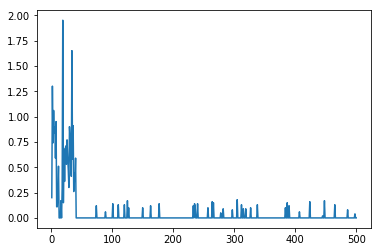

In [3]:
# plot of rewards

import matplotlib.pyplot as plt

plt.plot(range(1,len(scores_history) +1 ), scores_history)

#plt.plot(range(1,len(scores) +1 ), scores)



In [22]:
import importlib
importlib.reload(agent)

<module 'agent' from '/home/workspace/agent.py'>

In [ ]:
%autoreload 1

When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 